In [1]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/cs210/Project"

Mounted at /content/drive


#Data Sets

For this project I found US crude oil import from 2009 to 2024. And I will compare the oil imports of US with Stock market volume/price.


Dat set:https://www.kaggle.com/datasets/alistairking/u-s-crude-oil-imports


##First Data set

Here we have the data set we have as a project. We have the stock price of US market.


In [ ]:
filename = "Stock Market Dataset.csv"
df_oil_price = pd.read_csv(join(path_prefix, filename))

In [ ]:
df_oil_price.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [ ]:
df_oil_price = df_oil_price[['Date','Crude_oil_Price','Crude_oil_Vol.']]
df_oil_price.head()

,Date,Crude_oil_Price,Crude_oil_Vol.
0,02-02-2024,72.28,NaN
1,01-02-2024,73.82,577940.0
2,31-01-2024,75.85,344490.0
3,30-01-2024,77.82,347240.0
4,29-01-2024,76.78,331930.0


In [ ]:
df_oil_price.rename(columns = {'Crude_oil_Price':'oil_price'}, inplace = True)
df_oil_price.rename(columns = {'Crude_oil_Vol.':'oil_volume'}, inplace = True)
df_oil_price.head()

,Date,oil_price,oil_volume
0,02-02-2024,72.28,NaN
1,01-02-2024,73.82,577940.0
2,31-01-2024,75.85,344490.0
3,30-01-2024,77.82,347240.0
4,29-01-2024,76.78,331930.0


In [ ]:
print(df_oil_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1243 non-null   object 
 1   oil_price   1243 non-null   float64
 2   oil_volume  1220 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.3+ KB
None


In [ ]:
print(df_oil_price.describe())

         oil_price    oil_volume
count  1243.000000  1.220000e+03
mean     67.577064  3.989038e+05
std      20.465500  2.161619e+05
min     -37.630000  1.702000e+04
25%      55.095000  2.835975e+05
50%      69.230000  3.668850e+05
75%      80.455000  5.072425e+05
max     123.700000  1.770000e+06


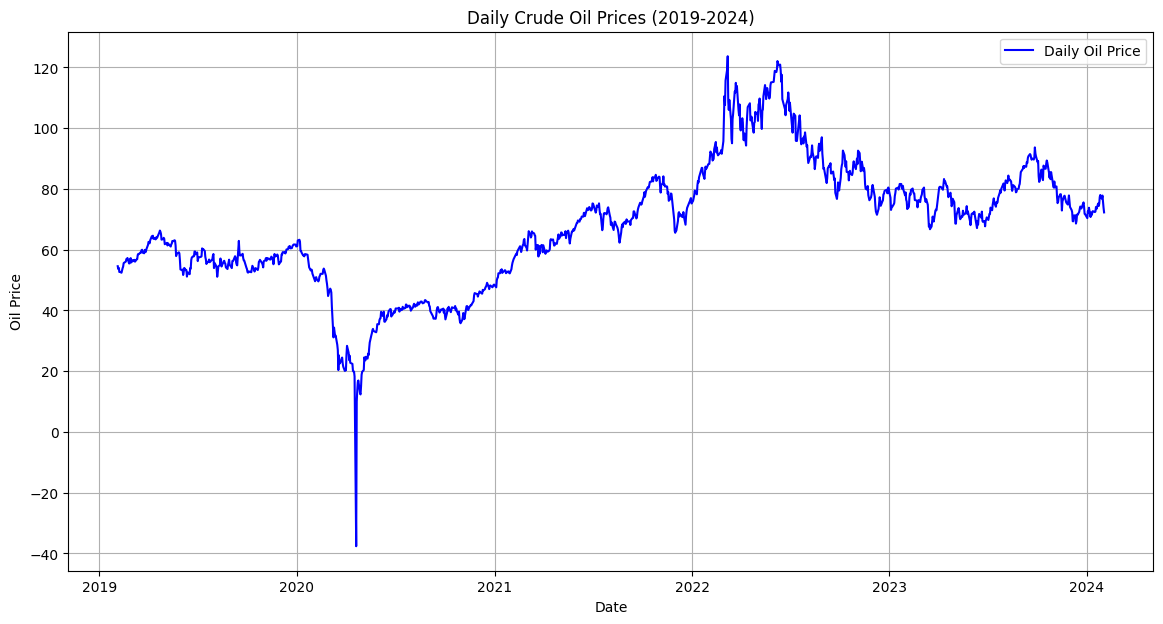

In [ ]:
# Ensure 'Date' is in datetime format and set as index if not already
df_oil_price['Date'] = pd.to_datetime(df_oil_price['Date'], format='%d-%m-%Y')
df_oil_price.set_index('Date', inplace=True)

# Plotting daily oil price
plt.figure(figsize=(14, 7))
plt.plot(df_oil_price['oil_price'], label='Daily Oil Price', color='blue')
plt.title('Daily Crude Oil Prices (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()

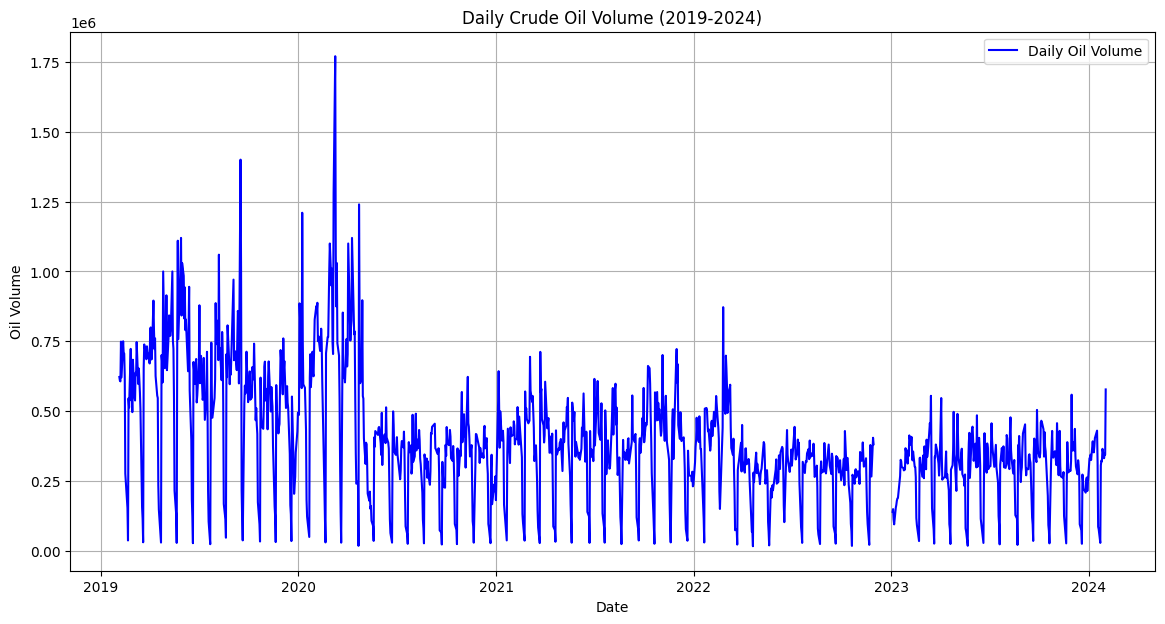

In [ ]:
# Plotting daily oil price
plt.figure(figsize=(14, 7))
plt.plot(df_oil_price['oil_volume'], label='Daily Oil Volume', color='blue')
plt.title('Daily Crude Oil Volume (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Oil Volume')
plt.legend()
plt.grid(True)
plt.show()

##Second Data set


In [ ]:
filename = "USAoilimport.csv"
df_oil_import = pd.read_csv(join(path_prefix, filename))

In [ ]:
df_oil_import.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,1,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,1,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,1,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,1,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,1,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


In [ ]:
print(df_oil_import.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483053 entries, 0 to 483052
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 483053 non-null  int64 
 1   month                483053 non-null  int64 
 2   originName           483053 non-null  object
 3   originTypeName       483053 non-null  object
 4   destinationName      483053 non-null  object
 5   destinationTypeName  483053 non-null  object
 6   gradeName            483053 non-null  object
 7   quantity             483053 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 29.5+ MB
None


In [ ]:
print(df_oil_import.describe(include='all'))

                 year          month originName originTypeName  \
count   483053.000000  483053.000000     483053         483053   
unique            NaN            NaN         70              4   
top               NaN            NaN      World        Country   
freq              NaN            NaN      88656         163003   
mean      2015.388875       6.459825        NaN            NaN   
std          4.295262       3.435325        NaN            NaN   
min       2009.000000       1.000000        NaN            NaN   
25%       2012.000000       3.000000        NaN            NaN   
50%       2015.000000       6.000000        NaN            NaN   
75%       2019.000000       9.000000        NaN            NaN   
max       2024.000000      12.000000        NaN            NaN   

           destinationName destinationTypeName   gradeName       quantity  
count               483053              483053      483053  483053.000000  
unique                 456                   7         

In [ ]:
# Assuming df_oil_import is already loaded with 'year' as an integer type
df_oil_import = df_oil_import[df_oil_import['year'] >= 2019]

# Check the filtered dataset
df_oil_import.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
349859,2019,1,Algeria,Country,PHILLIPS 66 CO / BAYWAY / NJ,Refinery,Light Sweet,636
349860,2019,1,Belize,Country,UNKNOWN PROCESSOR-LA / UNKNOWN PROCESSOR-LA / LA,Refinery,Heavy Sour,68
349861,2019,1,United Kingdom,Country,ERGON REFINING INC / VICKSBURG / MS,Refinery,Heavy Sour,507
349862,2019,1,United Kingdom,Country,PHILADELPHIA ENERGY SOLUTIONS / PHILADELPHIA / PA,Refinery,Heavy Sour,523
349863,2019,1,Chad,Country,MOTIVA ENTERPRISES LLC / PORT ARTHUR / TX,Refinery,Medium,477


In [ ]:
df_oil_import.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133194 entries, 349859 to 483052
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 133194 non-null  int64 
 1   month                133194 non-null  int64 
 2   originName           133194 non-null  object
 3   originTypeName       133194 non-null  object
 4   destinationName      133194 non-null  object
 5   destinationTypeName  133194 non-null  object
 6   gradeName            133194 non-null  object
 7   quantity             133194 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 9.1+ MB


In [ ]:
# Convert year and month to a date (first day of each month)
df_oil_import['Date'] = pd.to_datetime(df_oil_import['year'].astype(str) + '-' + df_oil_import['month'].astype(str), format='%Y-%m') + pd.offsets.MonthEnd()
df_oil_import.drop(['year', 'month'], axis=1, inplace=True)

# Check the new date column
df_oil_import.head()

,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity,Date
349859,Algeria,Country,PHILLIPS 66 CO / BAYWAY / NJ,Refinery,Light Sweet,636,2019-01-31
349860,Belize,Country,UNKNOWN PROCESSOR-LA / UNKNOWN PROCESSOR-LA / LA,Refinery,Heavy Sour,68,2019-01-31
349861,United Kingdom,Country,ERGON REFINING INC / VICKSBURG / MS,Refinery,Heavy Sour,507,2019-01-31
349862,United Kingdom,Country,PHILADELPHIA ENERGY SOLUTIONS / PHILADELPHIA / PA,Refinery,Heavy Sour,523,2019-01-31
349863,Chad,Country,MOTIVA ENTERPRISES LLC / PORT ARTHUR / TX,Refinery,Medium,477,2019-01-31


## Daily vs Monthly Data

Right now the frequency of our data sets are not matching each other. US oil import dataset has monthly data, while on the other hand, stock market has daily data. To fix this, we will convert stock market data set to monthly data as well.

To make that happen, we will take the last day of each month from stock market data set. For financial and stock market data, especially when matching it with monthly data like imports, taking the last available data point for each month (often referred to as the "month-end close") is a common practice. This approach typically reflects the closing price and volume of the stock for that month, which is often used in financial reporting and analysis.

In [ ]:
# Resample data to get the last entry of each month
monthly_oil_price = df_oil_price.resample('M').last()

# Reset index to turn 'Date' back into a column if needed
monthly_oil_price.reset_index(inplace=True)

# Check the resampled dataframe
monthly_oil_price.head()

,Date,oil_price,oil_volume
0,2019-02-28,57.22,496680.0
1,2019-03-31,60.14,705560.0
2,2019-04-30,63.91,750490.0
3,2019-05-31,53.50,1030000.0
4,2019-06-30,58.47,556100.0


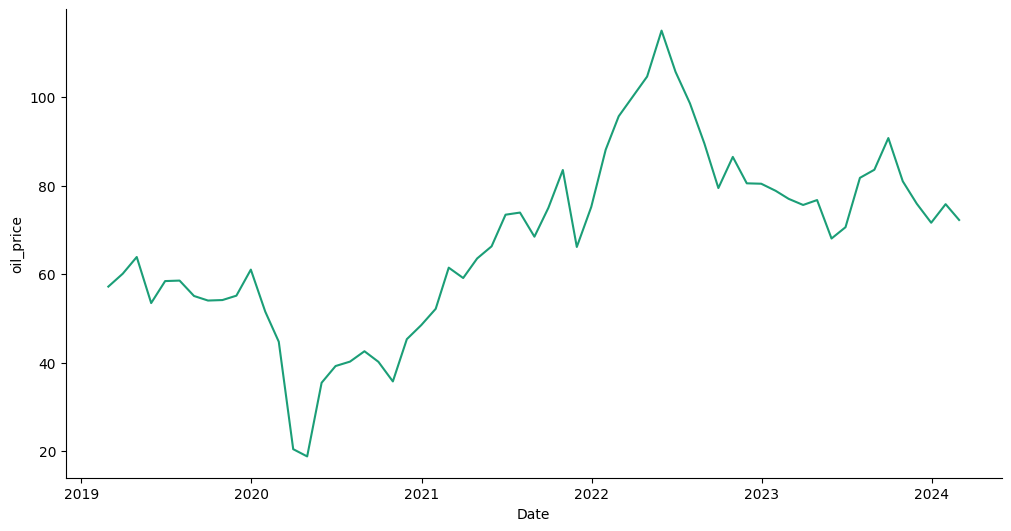

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['oil_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_oil_price.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('oil_price')

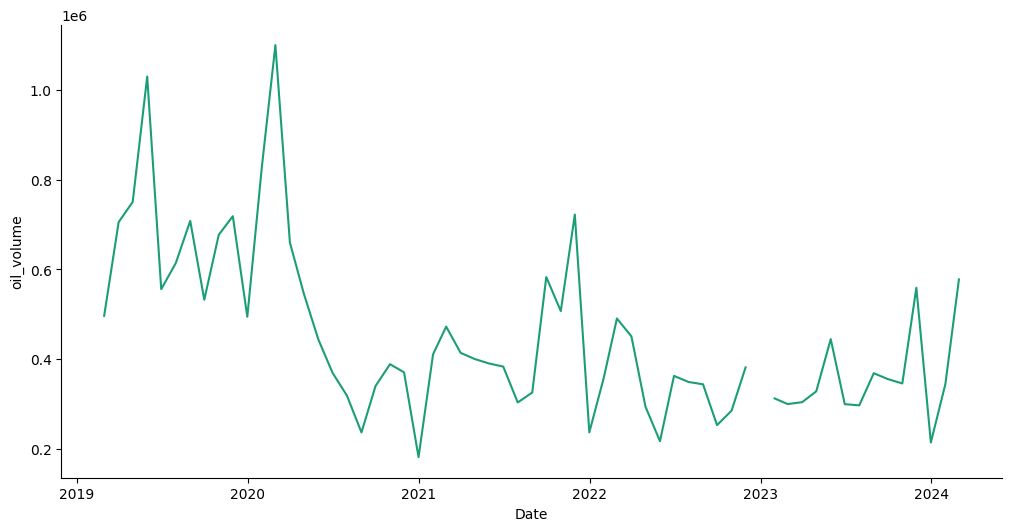

In [ ]:
# @title Date vs oil_volume

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['oil_volume']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_oil_price.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('oil_volume')

##NaN-Values


In [ ]:
# Calculate the percentage of missing values for each column in df_oil_price
missing_percentage_oil_price = monthly_oil_price.isnull().mean() * 100
print("Percentage of missing values in monthly_oil_price:")
print(missing_percentage_oil_price)

# Calculate the percentage of missing values for each column in df_oil_import
missing_percentage_oil_import = df_oil_import.isnull().mean() * 100
print("Percentage of missing values in df_oil_import:")
print(missing_percentage_oil_import)


Percentage of missing values in monthly_oil_price:
Date          0.000000
oil_price     0.000000
oil_volume    1.639344
dtype: float64
Percentage of missing values in df_oil_import:
originName             0.0
originTypeName         0.0
destinationName        0.0
destinationTypeName    0.0
gradeName              0.0
quantity               0.0
Date                   0.0
dtype: float64


In [ ]:
# First, create temporary columns for forward fill and backward fill
monthly_oil_price['ffill'] = monthly_oil_price['oil_volume'].fillna(method='ffill')
monthly_oil_price['bfill'] = monthly_oil_price['oil_volume'].fillna(method='bfill')

# Now, take the mean of these two columns and use it to fill in the NaNs in 'oil_volume'
monthly_oil_price['oil_volume'] = monthly_oil_price['oil_volume'].fillna((monthly_oil_price['ffill'] + monthly_oil_price['bfill']) / 2)

# Drop the temporary columns as they are no longer needed
monthly_oil_price.drop(columns=['ffill', 'bfill'], inplace=True)

# Check the results
monthly_oil_price.head()


,Date,oil_price,oil_volume
0,2019-02-28,57.22,496680.0
1,2019-03-31,60.14,705560.0
2,2019-04-30,63.91,750490.0
3,2019-05-31,53.50,1030000.0
4,2019-06-30,58.47,556100.0


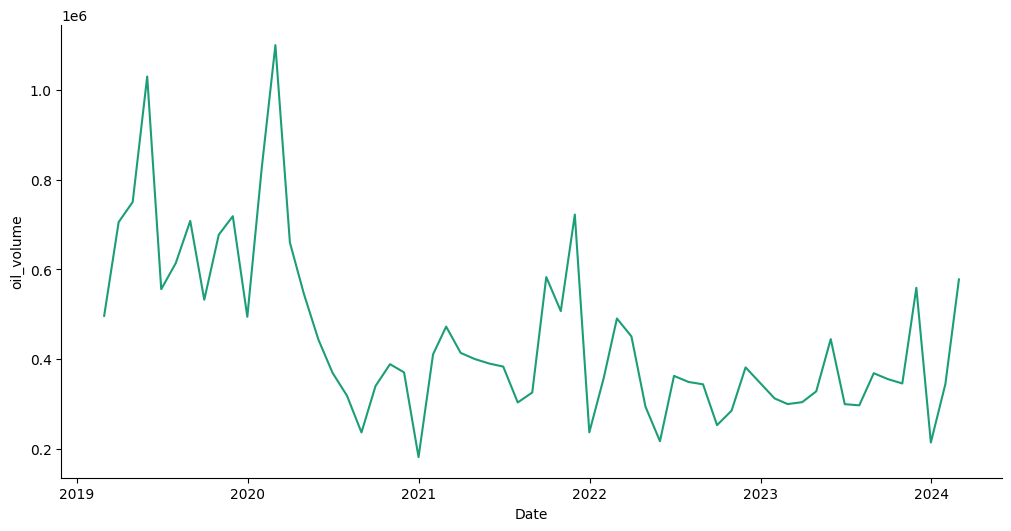

In [ ]:
# @title Date vs oil_volume

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['oil_volume']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_oil_price.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('oil_volume')

## Scatter plots

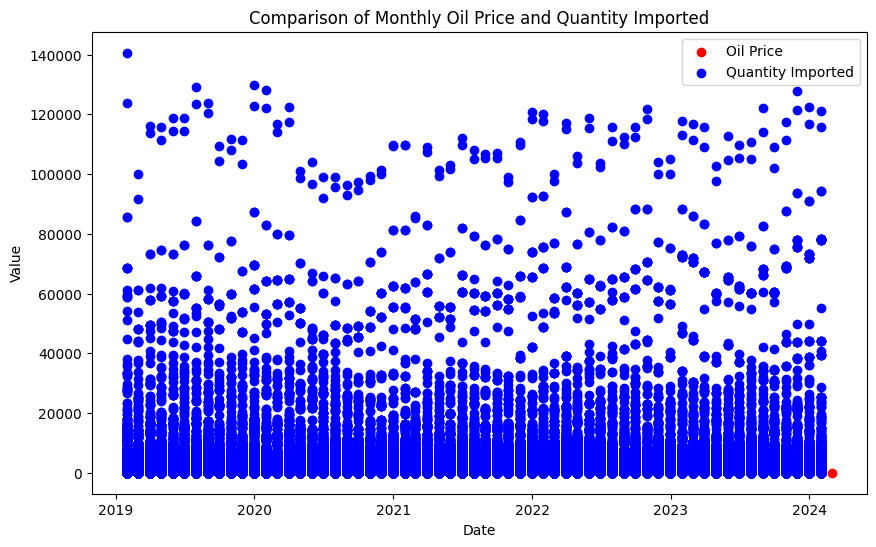

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(monthly_oil_price['Date'], monthly_oil_price['oil_price'], color='red', label='Oil Price')
plt.scatter(df_oil_import['Date'], df_oil_import['quantity'], color='blue', label='Quantity Imported')
plt.title('Comparison of Monthly Oil Price and Quantity Imported')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

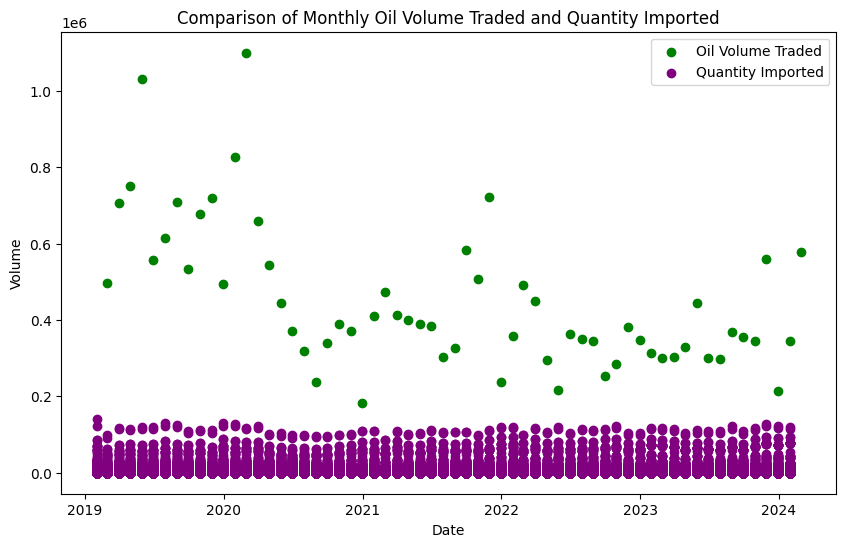

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_oil_price['Date'], monthly_oil_price['oil_volume'], color='green', label='Oil Volume Traded')
plt.scatter(df_oil_import['Date'], df_oil_import['quantity'], color='purple', label='Quantity Imported')
plt.title('Comparison of Monthly Oil Volume Traded and Quantity Imported')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


###Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale
monthly_oil_price[['oil_price', 'oil_volume']] = scaler.fit_transform(monthly_oil_price[['oil_price', 'oil_volume']])
df_oil_import['quantity'] = scaler.fit_transform(df_oil_import[['quantity']])

# Check the scaled data
monthly_oil_price.head()

,Date,oil_price,oil_volume
0,2019-02-28,0.398836,0.342867
1,2019-03-31,0.429180,0.570378
2,2019-04-30,0.468357,0.619316
3,2019-05-31,0.360179,0.923756
4,2019-06-30,0.411826,0.407587


In [ ]:
df_oil_import.head()

,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity,Date
349859,Algeria,Country,PHILLIPS 66 CO / BAYWAY / NJ,Refinery,Light Sweet,0.004516,2019-01-31
349860,Belize,Country,UNKNOWN PROCESSOR-LA / UNKNOWN PROCESSOR-LA / LA,Refinery,Heavy Sour,0.000476,2019-01-31
349861,United Kingdom,Country,ERGON REFINING INC / VICKSBURG / MS,Refinery,Heavy Sour,0.003599,2019-01-31
349862,United Kingdom,Country,PHILADELPHIA ENERGY SOLUTIONS / PHILADELPHIA / PA,Refinery,Heavy Sour,0.003712,2019-01-31
349863,Chad,Country,MOTIVA ENTERPRISES LLC / PORT ARTHUR / TX,Refinery,Medium,0.003385,2019-01-31


In [ ]:
# Aggregate the quantity of imports by month
total_imports_per_month = df_oil_import.groupby('Date')['quantity'].sum().reset_index()
total_imports_per_month['quantity'] = scaler.fit_transform(total_imports_per_month[['quantity']])
total_imports_per_month.head()

,Date,quantity
0,2019-01-31,1.000000
1,2019-02-28,0.271312
2,2019-03-31,0.687594
3,2019-04-30,0.683418
4,2019-05-31,0.830262


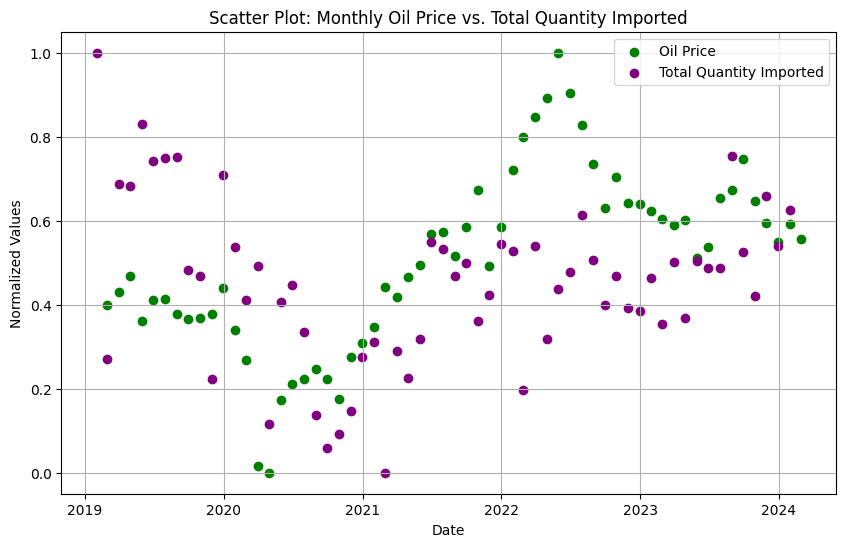

In [ ]:
# Scatter plot for Oil Price vs Total Quantity Imported
plt.figure(figsize=(10, 6))
plt.scatter(monthly_oil_price['Date'], monthly_oil_price['oil_price'], color='green', label='Oil Price')
plt.scatter(total_imports_per_month['Date'], total_imports_per_month['quantity'], color='purple', label='Total Quantity Imported')
plt.title('Scatter Plot: Monthly Oil Price vs. Total Quantity Imported')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


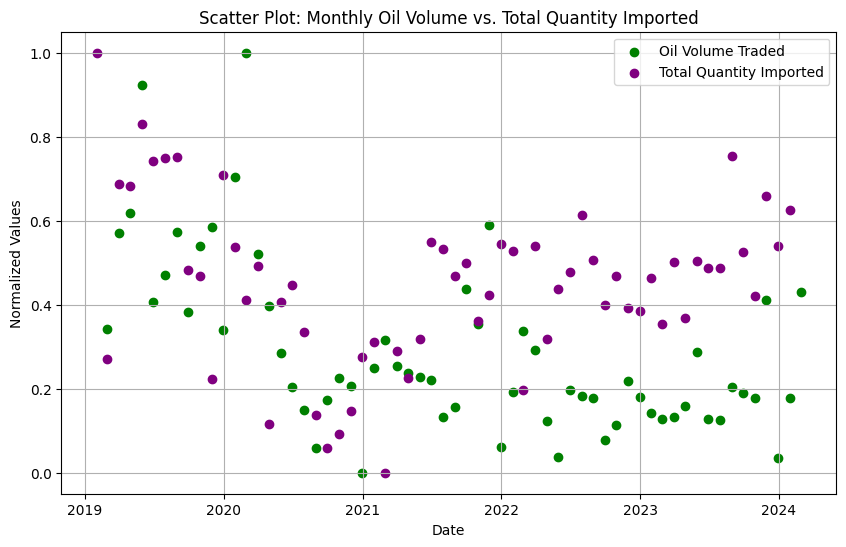

In [ ]:
# Scatter plot for Oil Volume vs Total Quantity Imported
plt.figure(figsize=(10, 6))
plt.scatter(monthly_oil_price['Date'], monthly_oil_price['oil_volume'], color='green', label='Oil Volume Traded')
plt.scatter(total_imports_per_month['Date'], total_imports_per_month['quantity'], color='purple', label='Total Quantity Imported')
plt.title('Scatter Plot: Monthly Oil Volume vs. Total Quantity Imported')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-31-1519ccc56a8e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='originName', y='quantity', data=df_oil_import, estimator=sum, ci=None)


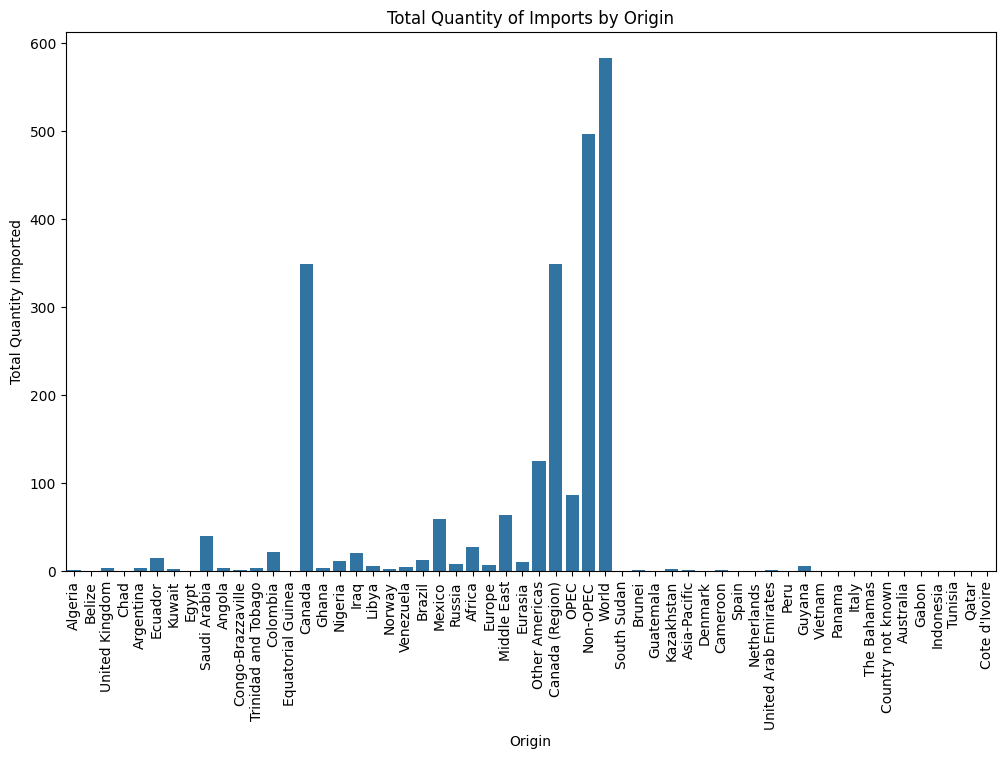

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for origin of imports based on quantity
plt.figure(figsize=(12, 7))
sns.barplot(x='originName', y='quantity', data=df_oil_import, estimator=sum, ci=None)
plt.title('Total Quantity of Imports by Origin')
plt.xlabel('Origin')
plt.ylabel('Total Quantity Imported')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.show()


<ipython-input-32-12ec6d516e83>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gradeName', y='quantity', data=df_oil_import, estimator=sum, ci=None)


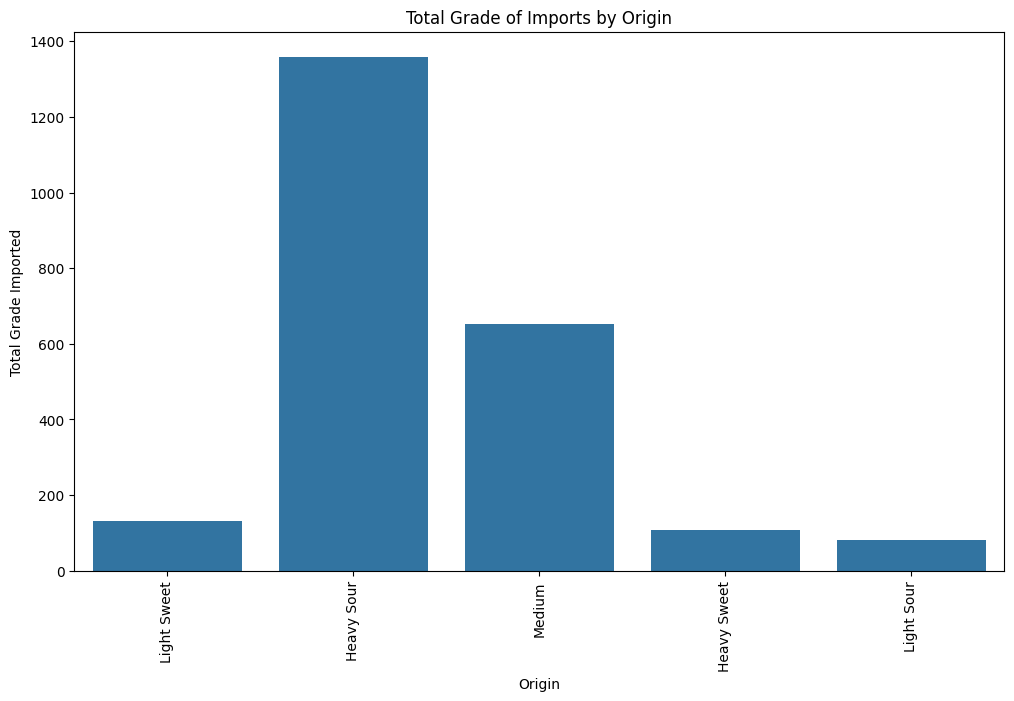

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for origin of imports based on quantity
plt.figure(figsize=(12, 7))
sns.barplot(x='gradeName', y='quantity', data=df_oil_import, estimator=sum, ci=None)
plt.title('Total Grade of Imports by Origin')
plt.xlabel('Origin')
plt.ylabel('Total Grade Imported')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.show()


##Hypothesis Testing


**Hypothesis 1: Impact of Oil Price on Import Quantity**

**Null Hypothesis (H0):** There is a significant correlation between monthly oil prices and the total quantity of oil imported.

**Alternative Hypothesis (H1):** There is no correlation between monthly oil prices and the total quantity of oil imported.








**Hypothesis 2: Impact of Oil Volume on Import Quantity**

**Null Hypothesis (H0):** There is a significant correlation between monthly oil volumes traded and the total quantity of oil imported.

**Alternative Hypothesis (H1):** There is no correlation between monthly oil volumes traded and the total quantity of oil imported.


In [ ]:
# Merge the datasets on 'Date'
merged_data = pd.merge(monthly_oil_price, total_imports_per_month, on='Date', how='inner')
merged_data.head()

,Date,oil_price,oil_volume,quantity
0,2019-02-28,0.398836,0.342867,0.271312
1,2019-03-31,0.429180,0.570378,0.687594
2,2019-04-30,0.468357,0.619316,0.683418
3,2019-05-31,0.360179,0.923756,0.830262
4,2019-06-30,0.411826,0.407587,0.743204


In [ ]:
from scipy.stats import pearsonr

# Test hypothesis 1: Correlation between oil prices and total quantity imported
corr_price_quantity, p_value_price_quantity = pearsonr(merged_data['oil_price'], merged_data['quantity'])
print("Correlation coefficient (Price vs. Quantity):", corr_price_quantity)
print("P-value (Price vs. Quantity):", p_value_price_quantity)

# Test hypothesis 2: Correlation between oil volumes and total quantity imported
corr_volume_quantity, p_value_volume_quantity = pearsonr(merged_data['oil_volume'], merged_data['quantity'])
print("Correlation coefficient (Volume vs. Quantity):", corr_volume_quantity)
print("P-value (Volume vs. Quantity):", p_value_volume_quantity)


Correlation coefficient (Price vs. Quantity): 0.26311306488060915
P-value (Price vs. Quantity): 0.04224144279444157
Correlation coefficient (Volume vs. Quantity): 0.28569323799333324
P-value (Volume vs. Quantity): 0.026914177601314163


**Oil Price vs. Total Quantity Imported:**

**Our correlation coefficient is 0.263.** This suggests a weak positive correlation between oil prices and the total quantity of oil imported. As oil prices increase, there seems to be a slight increase in the quantity of oil imported, but the relationship is not strong.


**P-value is 0.042** This p-value is less than the commonly used significance level of 0.05, which means the correlation is statistically significant. You have sufficient evidence to reject the null hypothesis (H0) that there is no correlation between oil prices and the total quantity of oil imported.


**Oil Volume vs. Total Quantity Imported:**

**Correlation coefficient is 0.286.** Similar to the price, there is a weak positive correlation between the volume of oil traded and the total quantity of oil imported.

**P-value is 0.027.**  Since this p-value is also below 0.05, the result is statistically significant, providing enough evidence to reject the null hypothesis that there is no correlation between oil volumes traded and the total quantity of oil imported.

In [ ]:
monthly_oil_price.head()

,Date,oil_price,oil_volume
0,2019-02-28,0.398836,0.342867
1,2019-03-31,0.429180,0.570378
2,2019-04-30,0.468357,0.619316
3,2019-05-31,0.360179,0.923756
4,2019-06-30,0.411826,0.407587


In [ ]:
merged_data.head()

,Date,oil_price,oil_volume,quantity
0,2019-02-28,0.398836,0.342867,0.271312
1,2019-03-31,0.429180,0.570378,0.687594
2,2019-04-30,0.468357,0.619316,0.683418
3,2019-05-31,0.360179,0.923756,0.830262
4,2019-06-30,0.411826,0.407587,0.743204


**Defining the Hypothesis**


**Null Hypothesis (H0):** There is no difference in the mean quantity of oil imports between months with high oil prices and months with low oil prices.


**Alternative Hypothesis (H1):** There is a significant difference in the mean quantity of oil imports between months with high oil prices and months with low oil prices.

In [ ]:
# Calculate the median oil price
median_price = merged_data['oil_price'].median()

# Define high and low price groups
high_price_data = merged_data[merged_data['oil_price'] > median_price]['quantity']
low_price_data = merged_data[merged_data['oil_price'] <= median_price]['quantity']


In [ ]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(high_price_data, low_price_data, equal_var=False)  # equal_var=False if variances might be unequal

print("T-Statistic:", t_stat)
print("P-value:", p_value)


T-Statistic: 1.6127382276987652
P-value: 0.11442184302639793


**T-Statistic:** The value of 1.613 indicates that there is a difference in the means of the two groups (high and low oil prices), but it's not very large.


**P-value:** The p-value of 0.114 is greater than the typical significance level of 0.05. This suggests that the observed difference in mean quantities of oil imports between high and low price months is not statistically significant at the 5% level.

**Null Hypothesis (H0):** Based on two-sample t-test, we do not have sufficient evidence to reject the null hypothesis. Therefore, based on this test, we conclude that there is no significant effect of oil price levels on the quantity of oil imported.

##Linear Regression

In [ ]:
import statsmodels.api as sm

# Add a constant to the independent variable matrix (required for statsmodels)
X = sm.add_constant(monthly_oil_price['oil_price'])  # Independent variable (oil price)
Y = total_imports_per_month['quantity']              # Dependent variable (quantity imported)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

In [ ]:
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.483
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.228
Time:                        10:53:52   Log-Likelihood:                 14.048
No. Observations:                  61   AIC:                            -24.10
Df Residuals:                      59   BIC:                            -19.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3776      0.066      5.760      0.0

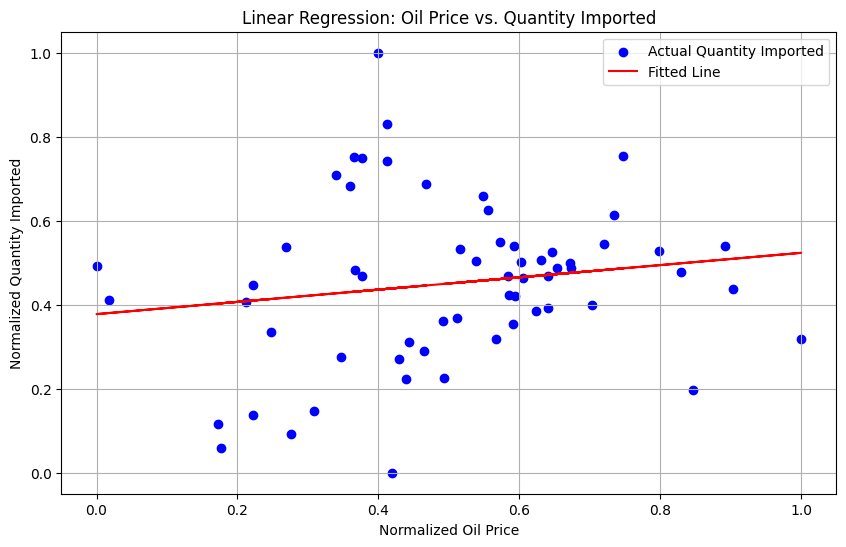

In [ ]:
X = sm.add_constant(monthly_oil_price['oil_price'])  # Independent variable
Y = total_imports_per_month['quantity']              # Dependent variable

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Predict values using the model
monthly_oil_price['predicted_quantity'] = model.predict(X)

# Plotting the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(monthly_oil_price['oil_price'], Y, color='blue', label='Actual Quantity Imported')

# Plotting the regression line
plt.plot(monthly_oil_price['oil_price'], monthly_oil_price['predicted_quantity'], color='red', label='Fitted Line')

plt.title('Linear Regression: Oil Price vs. Quantity Imported')
plt.xlabel('Normalized Oil Price')
plt.ylabel('Normalized Quantity Imported')
plt.legend()
plt.grid(True)
plt.show()

##Machine Learning Algorithms

###ML preperation

In [ ]:
merged_data

,Date,oil_price,oil_volume,quantity
0,2019-02-28,0.398836,0.342867,0.271312
1,2019-03-31,0.429180,0.570378,0.687594
2,2019-04-30,0.468357,0.619316,0.683418
3,2019-05-31,0.360179,0.923756,0.830262
4,2019-06-30,0.411826,0.407587,0.743204
5,2019-07-31,0.412969,0.470652,0.750125
6,2019-08-31,0.376806,0.573330,0.752534
7,2019-09-30,0.366102,0.381904,0.482298
8,2019-10-31,0.367245,0.539728,0.469391
9,2019-11-30,0.377533,0.584712,0.222932


In [ ]:
from sklearn.model_selection import train_test_split

X = merged_data[['quantity']]  # Features
y = merged_data['oil_price']     # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the kNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'kNN Mean Squared Error: {knn_mse}')


kNN Mean Squared Error: 0.05839946696401909


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f'Decision Tree Mean Squared Error: {dt_mse}')

Decision Tree Mean Squared Error: 0.06162823571079378


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)


# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse}')

Random Forest Mean Squared Error: 0.05898595996309822


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse}')

Random Forest Mean Squared Error: 0.05737507928300431


###Future Work



*   MSE is not a good error function, since all my dataset it normalized. Values of my data is between 0-1 so every error is also between 0-1, when we take the square of these values, error seems like it is getting smaller. This is confusing, thus we need to apply RMSE and not MSE
*   At last part we showed 3 different machine learning algorithms **BUT, their parameters are not tuned nor tested.** For step 3 of the project, hyperparameters should be tested, and best parameters should be used to compare the models.

